# Solving the n-Queens Problem using Local Search

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))


def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


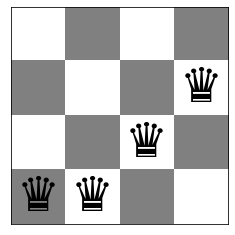

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [2]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


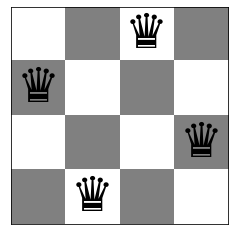

In [3]:
board = [1,3,0,2]
show_board(board)

## Corey Ellis
## CS7320

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

### Task 1 Response

In order to implement the steepest ascent hill climbing algorithm, I chose to first record the size of the board and the number of initial conflicts. To measure the number of conflicts after each move, I created a two dimensional array "conflictValues" that evaluates the number of conflicts when each queen moves along its current column. Afterwards, the minimum is found and if that is less than the current optimum number of conflicts, then we will commit to this move. This manuever gets the solution coordinates for the new state of the board and resets the optimum and the board with this setup. Once the number of conflicts reaches zero or there are no more moves that can minimize the objective function, the method ends and returns the optimal board found.

In [67]:
def Steepest_Ascent(board, verbose = False):
    if verbose: 
        show_board(board)
    
    n = len(board)
    optimum = conflicts(board)
    conflictValues = np.full([n,n], -1, dtype = int) #set initial grid to -1
    steps = 0
    
    while True:
        if(optimum == 0): 
            if verbose: print("Steps: %d" % (steps))
            return board
        for y in range(n):
            queen = board[y] #get original queen location in column
            for x in range(n):
                board[y] = x
                conflictValues[x,y] = conflicts(board)
            board[y] = queen
        curr_min = np.min(conflictValues)
        
        steps += 1
        
        if verbose:
            print(f"Conflicts Before: {optimum}")
            print(f"Conflicts Now: {curr_min}")
                  
        if(optimum > curr_min):
            w = np.where(conflictValues == curr_min)
            optimum = [a for a in zip(w[0], w[1])] #Create Tuples of solution coordinates
            optimum = optimum[np.random.randint(0, len(optimum))]
            board[optimum[1]] = optimum[0]
            optimum = curr_min
            if verbose:
                  show_board(board)
        else: 
            
            if verbose: print("Steps: %d" % (steps))
            return board
    
    
            

Board with 4 conflicts.


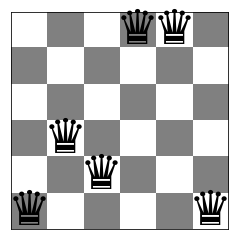

Conflicts Before: 4
Conflicts Now: 3
Board with 3 conflicts.


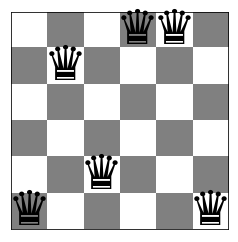

Conflicts Before: 3
Conflicts Now: 1
Board with 1 conflicts.


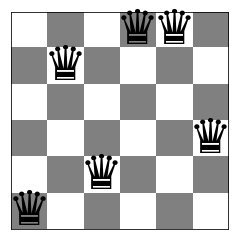

Conflicts Before: 1
Conflicts Now: 1
Steps: 3


In [31]:
b = random_board(6)
board = Steepest_Ascent(b, verbose = True)

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

### Task 2 Response

The stochastic hill climbing method uses a similar skeleton as the steepest ascension algorithm. Here the conflicts of each move are once again measured, but instead of choosing the minimum direction, we choose a random direction to move that is still uphill. This random choice is the new optimum and the board now matches the characteristics of this new minimum. Similar to the previous method, the measurement ends when there are no more uphill moves available or the optimum is equal to 0.

In [68]:
def Stochastic_Climb(board, verbose = False):
    if verbose: 
        show_board(board)
    
    n = len(board)
    optimum = conflicts(board)
    conflictValues = np.full([n,n], -1, dtype = int) #set initial grid to -1
    steps = 0
    
    while True:
        if(optimum == 0): 
            if verbose: print("Steps: %d" % (steps))
            return board
        for y in range(n):
            queen = board[y] #get original queen location in column
            for x in range(n):
                board[y] = x
                conflictValues[x,y] = conflicts(board)
            board[y] = queen
            
            
        options = []
        for i in range(n):
            for j in range(n):
                if conflictValues[i][j] < optimum:
                    options.append(conflictValues[i][j])
                    
        
        steps += 1
        
        if len(options) > 0:
            curr_min = np.random.choice(options)
            
            if verbose:
                print(f"Conflicts Before: {optimum}")
                print(f"Conflicts Now: {curr_min}")
            
            if(optimum > curr_min):
                w = np.where(conflictValues == curr_min)
                optimum = [a for a in zip(w[0], w[1])] #Create Tuples of solution coordinates
                optimum = optimum[np.random.randint(0, len(optimum))]
                board[optimum[1]] = optimum[0]
                optimum = curr_min
                if verbose:
                      show_board(board)
            else: 
                if verbose: print("Steps: %d" % (steps))
                return board
        else: 
            break
    if verbose: print("Steps: %d" % (steps))      
    return board

Board with 5 conflicts.


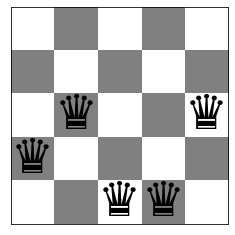

Conflicts Before: 5
Conflicts Now: 3
Board with 3 conflicts.


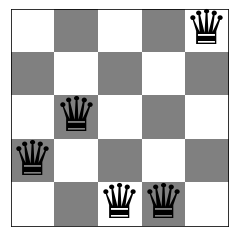

Conflicts Before: 3
Conflicts Now: 2
Board with 2 conflicts.


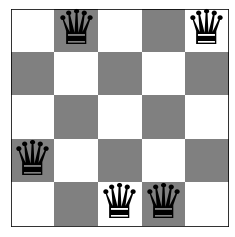

Conflicts Before: 2
Conflicts Now: 1
Board with 1 conflicts.


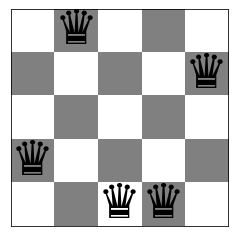

Conflicts Before: 1
Conflicts Now: 0
Board with 0 conflicts.


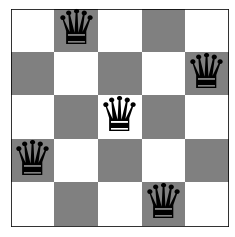

Steps: 4


In [54]:
board = random_board(5)
b = Stochastic_Climb(board, verbose = True)

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

### Task 3 Response

The first choice climb method is the same as the previous stochastic method but only calculates one possible moves conflict value. This new conflict measurement is compared to the current optimum and a move is made only if the new position features less conflicts. Since there is a possibility of the chosen direction being less than the optimum, there is a limit placed so that the algorithm doesn't get stuck picking downhill moves forever. 

In [128]:
def First_Choice_Climb(board, max_steps = 5000, verbose = False):
    if verbose: 
        show_board(board)
    
    n = len(board)
    optimum = conflicts(board)
    conflictValues = np.full([n,n], -1, dtype = int) #set initial grid to -1
    steps = 0
    non_moves = 0 #count of moves that are not taken
    limit = 50*n #number of non-moves allowed in a row
    
    while steps < max_steps:
        if(optimum == 0): 
            if verbose: print("Steps: %d" % (steps))
            return board
        
        for y in range(n):
            queen = board[y] #get original queen location in column
            for x in range(n):
                board[y] = x
                conflictValues[x,y] = conflicts(board)
            board[y] = queen
            
        a = np.random.randint(0,n)
        b = np.random.randint(0,n)
        curr_min = conflictValues[a][b]
                    
        steps += 1
        
            
        if(optimum > curr_min):
            if verbose:
                print(f"Conflicts Before: {optimum}")
                print(f"Conflicts Now: {curr_min}")
            
            non_moves = 0
            w = np.where(conflictValues == curr_min)
            optimum = [a for a in zip(w[0], w[1])] #Create Tuples of solution coordinates
            optimum = optimum[np.random.randint(0, len(optimum))]
            board[optimum[1]] = optimum[0]
            optimum = curr_min
            if verbose:
                  show_board(board)
        else:
            non_moves = non_moves+1
            if non_moves > limit: 
                break
            
    if(verbose):    
        print("Steps: %d" % (steps))      
    return board

Board with 4 conflicts.


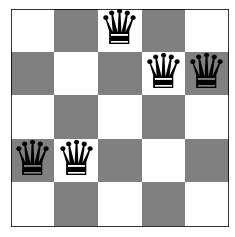

Conflicts Before: 4
Conflicts Now: 3
Board with 3 conflicts.


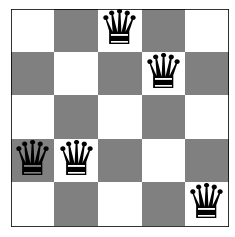

Conflicts Before: 3
Conflicts Now: 2
Board with 2 conflicts.


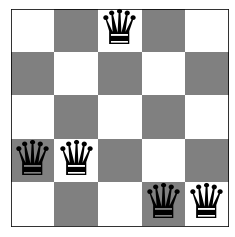

Conflicts Before: 2
Conflicts Now: 1
Board with 1 conflicts.


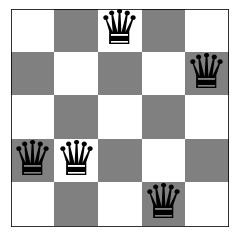

Steps: 538


In [58]:
board = random_board(5)
b = First_Choice_Climb(board, verbose = True)

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algoithm several times starting with a new random board.

### Task 4 Response

The random restart algorithm takes in a particular algorithm and the size of the chess board being used. This function will then attempt to solve the given problem for the indicated number of times given by the parameter "iterations. The optimal solution from the solutions found is stored and is returned after all iterations are complete or the zero conflict board is found.

In [135]:
def random_restart(method, n, iterations = 100, verbose = False):
    optimum_Board = random_board(n)
    optimum_Conflicts = conflicts(optimum_Board)
    
    for i in range(iterations):
        curr_board = random_board(n)
        sol_board = method(curr_board, verbose = False)
        c = conflicts(sol_board)
        
        if(c < optimum_Conflicts):
            optimum_Board = sol_board
            optimum_Conflicts = c
            
        if(optimum_Conflicts == 0):
            if verbose:
                print("Iterations: %d" % (i))
            return optimum_Board
    
    if verbose: print("Iterations: %d" % (i))
    return optimum_Board

In [72]:
print("Steep Ascent")
bSteep = random_restart(Steepest_Ascent,6)
print("Stochastic Climb")
bStoc = random_restart(Stochastic_Climb,6)
print("First Choice Climb")
bFirst = random_restart(First_Choice_Climb,6)


Steep Ascent
Iterations: 1
Stochastic Climb
Iterations: 4
First Choice Climb
Iterations: 8


## Task 5: Compare Performance [20 Points]

Use runtime and objective function value to compare the algorithms. 

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../Python_Code_Examples/profiling_code.ipynb) for help about how to measure runtime in Python.

In [96]:
import time
import numpy as np
import pandas as pd

n = 100
total = 0
boards = [4,5,6,7,8,9,10,11,12,13,14]
avgObj = []
avgTimes = []

for b in boards:
    obj = []
    times = []
    for j in range(n):
        randomB = random_board(b)
        start = time.time()
        solve = Steepest_Ascent(randomB)
        stop = time.time()
        obj.append(conflicts(solve))
        times.append((stop-start)*1e3)
   
    avgObj.append(np.average(obj))
    avgTimes.append(np.average(times)) 
    

In [119]:
allTimes = pd.DataFrame({'Boards': np.array(boards), 'Steepest Ascent Mean Time (ms)': avgTimes}) 
allTimes.columns=['Board Size','Steepest Ascent']
allTimes.style.set_caption("Average Times in milliseconds")
allObjs = pd.DataFrame({'Boards': np.array(boards), 'Steepest Ascent Mean Time (ms)': avgObj}) 
allObjs.columns=['Board Size','Steepest Ascent']
display(allTimes)
display(allObjs)


,Board Size,Steepest Ascent
0,4,0.729740
1,5,0.830665
2,6,1.779559
3,7,2.819104
4,8,5.310254
5,9,8.276548
6,10,10.055363
7,11,14.002213
8,12,19.234533
9,13,28.222857


,Board Size,Steepest Ascent
0,4,0.67
1,5,0.41
2,6,1.19
3,7,1.05
4,8,1.17
5,9,1.42
6,10,1.67
7,11,1.71
8,12,1.86
9,13,1.93


In [120]:
n = 100
total = 0
boards = [4,5,6,7,8,9,10,11,12,13,14]
avgObj = []
avgTimes = []

for b in boards:
    obj = []
    times = []
    for j in range(n):
        randomB = random_board(b)
        start = time.time()
        solve = Stochastic_Climb(randomB)
        stop = time.time()
        obj.append(conflicts(solve))
        times.append((stop-start)*1e3)
   
    avgObj.append(np.average(obj))
    avgTimes.append(np.average(times)) 
    

In [121]:
allTimes['Stochastic Climb'] = avgTimes
allObjs['Stochastic Climb'] = avgObj

In [131]:
n = 20
total = 0
boards = [4,5,6,7,8,9,10,11,12,13,14]
avgObj = []
avgTimes = []

for b in boards:
    obj = []
    times = []
    for j in range(n):
        randomB = random_board(b)
        start = time.time()
        solve = First_Choice_Climb(randomB)
        stop = time.time()
        obj.append(conflicts(solve))
        times.append((stop-start)*1e3)
   
    avgObj.append(np.average(obj))
    avgTimes.append(np.average(times)) 
    

In [132]:
allTimes['First Choice Climb'] = avgTimes
allObjs['First Choice Climb'] = avgObj

In [133]:
display(allTimes)
display(allObjs)

,Board Size,Steepest Ascent,Stochastic Climb,First Choice Climb
0,4,0.729740,1.100531,18.498039
1,5,0.830665,1.521239,24.216807
2,6,1.779559,3.055844,107.686627
3,7,2.819104,5.319533,191.638696
4,8,5.310254,9.688857,346.095526
5,9,8.276548,16.508839,596.873093
6,10,10.055363,15.832586,926.345766
7,11,14.002213,31.875250,1511.276150
8,12,19.234533,45.747664,2101.464391
9,13,28.222857,55.526776,2947.897685


,Board Size,Steepest Ascent,Stochastic Climb,First Choice Climb
0,4,0.67,0.87,0.90
1,5,0.41,0.59,0.60
2,6,1.19,1.06,1.40
3,7,1.05,1.24,1.25
4,8,1.17,1.44,1.40
5,9,1.42,1.43,1.55
6,10,1.67,1.60,1.35
7,11,1.71,1.79,1.75
8,12,1.86,1.97,1.65
9,13,1.93,1.89,2.10


### Task 5 Response Pt. 1

The use of the three basic solutions to solve the local search problem reached similar averages in the objective function. Suprisingly, the steepest ascent model kept a relatively comparable objective value while not reaching nearly as long of a duration in time required to return a solution. It is clear to see that the First Choice Climb grows exponentially in the amount of time required to reach a solution. The reason for this time is due to the optimal solution (optimum = 0) not being reached often by the algorithm. The lack of actual optimum's found among the algorithms illustrates the limitations of local searches as local mimimums are difficult to escape. 
***Note: First Choice only run 20 times instead of 100 like the others due to time complexity for each run for First Choice Climb compared to other methods*** 

In [136]:
n = 100
total = 0
boards = [4,5,6,7,8,9,10,11,12,13,14]
avgObj = []
avgTimes = []

for b in boards:
    obj = []
    times = []
    for j in range(n):
        randomB = random_board(b)
        start = time.time()
        solve = random_restart(Steepest_Ascent, b, iterations = 30)
        stop = time.time()
        obj.append(conflicts(solve))
        times.append((stop-start)*1e3)
   
    avgObj.append(np.average(obj))
    avgTimes.append(np.average(times)) 
    

In [137]:
allTimes['Restart Steep'] = avgTimes
allObjs['Restart Steep'] = avgObj

In [139]:
n = 100
total = 0
boards = [4,5,6,7,8,9,10,11,12,13,14]
avgObj = []
avgTimes = []

for b in boards:
    obj = []
    times = []
    for j in range(n):
        randomB = random_board(b)
        start = time.time()
        solve = random_restart(Stochastic_Climb, b, iterations = 30)
        stop = time.time()
        obj.append(conflicts(solve))
        times.append((stop-start)*1e3)
   
    avgObj.append(np.average(obj))
    avgTimes.append(np.average(times)) 
    

In [140]:
allTimes['Restart Stochastic'] = avgTimes
allObjs['Restart Stochastic'] = avgObj

In [142]:
n = 20
total = 0
boards = [4,5,6,7,8,9,10,11,12,13,14]
avgObj = []
avgTimes = []

for b in boards:
    obj = []
    times = []
    for j in range(n):
        randomB = random_board(b)
        start = time.time()
        solve = random_restart(First_Choice_Climb, b, iterations = 30)
        stop = time.time()
        obj.append(conflicts(solve))
        times.append((stop-start)*1e3)
   
    avgObj.append(np.average(obj))
    avgTimes.append(np.average(times)) 
    
allTimes['Restart First Choice'] = avgTimes
allObjs['Restart First Choice'] = avgObj

In [194]:
print("Average Times")
display(allTimes)


Average Times


,Board Size,Steepest Ascent,Stochastic Climb,First Choice Climb,Restart Steep,Restart Stochastic,Restart First Choice
0,4,0.729740,1.100531,18.498039,0.930421,1.415606,78.031802
1,5,0.830665,1.521239,24.216807,0.795715,0.937881,26.429665
2,6,1.779559,3.055844,107.686627,11.837087,15.438530,988.724005
3,7,2.819104,5.319533,191.638696,6.217752,12.417424,744.615090
4,8,5.310254,9.688857,346.095526,22.187526,33.437870,2827.861214
5,9,8.276548,16.508839,596.873093,37.031188,51.718783,4074.050510
6,10,10.055363,15.832586,926.345766,116.249964,187.013621,10154.552758
7,11,14.002213,31.875250,1511.276150,192.656391,287.313981,31177.074564
8,12,19.234533,45.747664,2101.464391,278.750017,426.701028,36555.515468
9,13,28.222857,55.526776,2947.897685,378.293746,582.332900,59663.497758


In [195]:
print("Average Objective Values")
display(allObjs)

Average Objective Values


,Board Size,Steepest Ascent,Stochastic Climb,First Choice Climb,Restart Steep,Restart Stochastic,Restart First Choice
0,4,0.67,0.87,0.90,0.00,0.00,0.00
1,5,0.41,0.59,0.60,0.00,0.00,0.00
2,6,1.19,1.06,1.40,0.03,0.04,0.00
3,7,1.05,1.24,1.25,0.00,0.00,0.00
4,8,1.17,1.44,1.40,0.01,0.01,0.00
5,9,1.42,1.43,1.55,0.02,0.00,0.00
6,10,1.67,1.60,1.35,0.20,0.13,0.00
7,11,1.71,1.79,1.75,0.32,0.20,0.50
8,12,1.86,1.97,1.65,0.25,0.28,0.25
9,13,1.93,1.89,2.10,0.25,0.28,0.40


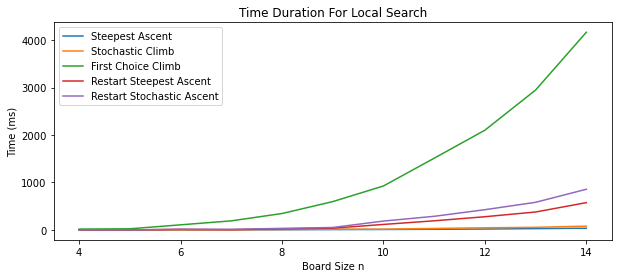

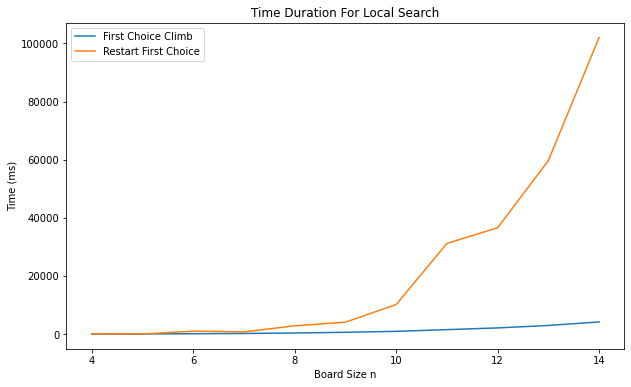

In [192]:
import matplotlib.pyplot as plt

plt.plot(allTimes["Board Size"], allTimes["Steepest Ascent"], label = "Steepest Ascent")
plt.plot(allTimes["Board Size"], allTimes["Stochastic Climb"], label = "Stochastic Climb")
plt.plot(allTimes["Board Size"], allTimes["First Choice Climb"], label = "First Choice Climb")
plt.plot(allTimes["Board Size"], allTimes["Restart Steep"], label = "Restart Steepest Ascent")
plt.plot(allTimes["Board Size"], allTimes["Restart Stochastic"], label = "Restart Stochastic Ascent")
plt.rcParams["figure.figsize"] = (10,6)
plt.title("Mean Time Duration For Local Search")
plt.xlabel("Board Size n")
plt.ylabel("Mean Time (ms)")
plt.legend()
plt.show()

plt.plot(allTimes["Board Size"], allTimes["First Choice Climb"], label = "First Choice Climb")
plt.plot(allTimes["Board Size"], allTimes["Restart First Choice"], label = "Restart First Choice")
plt.rcParams["figure.figsize"] = (10,4)
plt.title("Mean Time Duration For Local Search")
plt.xlabel("Board Size n")
plt.ylabel("Mean Time (ms)")
plt.legend()
plt.show()

### Time analysis

When assessing the time complexity of each of the local search methods graphically, it appears that the standard stochastic and steeepest ascent algorithms grow significantly smaller thanthe other algorithms. Even when considering the random restart variations of the searches, the First Choice Climb is still the worst performing when measuring performance solely on time. The random restarts, while increasing the growth of the time required by the algorithm in all searches as the board size increases, didn't have much weight on the smaller board sizes and would be the preferred method of solving the problem for these small boards. The use of restarts with the sow first choice solving algorithm is the least practical as the original method already grew in time exponentially. The use of restarts with this method increases that growth rate and is significantly higher than the orginal function once the board reaches n=8.

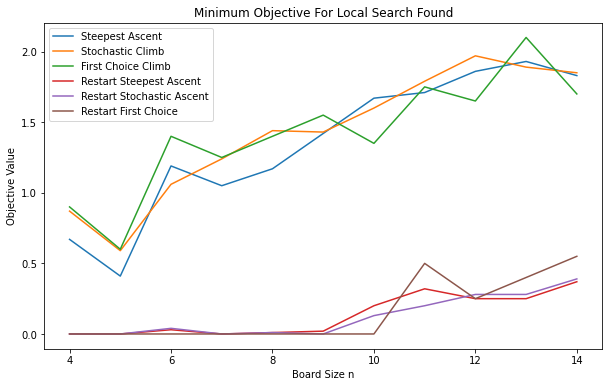

In [173]:
plt.plot(allObjs["Board Size"], allObjs["Steepest Ascent"], label = "Steepest Ascent")
plt.plot(allObjs["Board Size"], allObjs["Stochastic Climb"], label = "Stochastic Climb")
plt.plot(allObjs["Board Size"], allObjs["First Choice Climb"], label = "First Choice Climb")
plt.plot(allObjs["Board Size"], allObjs["Restart Steep"], label = "Restart Steepest Ascent")
plt.plot(allObjs["Board Size"], allObjs["Restart Stochastic"], label = "Restart Stochastic Ascent")
plt.plot(allObjs["Board Size"], allObjs["Restart First Choice"], label = "Restart First Choice")
plt.rcParams["figure.figsize"] = (10,6)
plt.title("Mean Objective For Local Search Found")
plt.xlabel("Board Size n")
plt.ylabel("Mean Objective Value")
plt.legend(loc=2)
plt.show()

### Objective Analysis

When assessing the overall solutions, it is evident that the use of random restarts imporves the ability for the algorithm to find the optimal solution as the averages for all restarting methods are below the averages of the original functions for all size boards. In addition, on average the original functions would not find the actual solution to the n-queens problem for any size board while the random restart functions would find the optimal solution on average up until the board size increased to 9x9 boards. It is also interesting to note that for this problem the two subgrups were coherent amognst them selves and didn't have much spread in the solutions to the problem posed.

### Each Boards Case

According to the data, the Steepest Ascent and Stochastic Climb do not have heavy restrictions on time duration when measuring performance as even the largest board can be solved in reasonable time. However, the optimal solution is only likely to be found when the board is of size 5x5 or less when considering reaching the ideal goal state. This same logic can be applied to the normal First Choice climb, but the exponential growth in time duration makes it impractical to use to find any local minimum once the board is of size 9x9 or larger.

The random restart functions can all reliably find the ideal goal state for all sizes 9x9 or less and is likely to find the goal state for all board sizes up to 14x14. The same time complexity issue arrises for the Random Restart First Choice Climb as the implementation becomes impractical around a 6x6 board as the time taken grows significantly. The other two random restarts continue to be practical for all board sizes but the trend line indicates that around 16x16 boards the use of these algorithms become less practical, but can be smaller if the number of restarts is reduced/

### Conclusion

Due to the information provided by the charts above, when considering my versions of each algorithms implementations, the preferred method of solving the n-queens problem would be Steepest Ascent with random restarts as this method minimizes the objective function the best in the quickest amount of time. Not far behind would be the random restart with stochastic random climbing as this method achieves similar results with only minor differences in time duration. First choice and first choice with restarts would be the worst options as they do not perform any better than the other methods while taking significantly more time to complete.

## Graduate student advanced task: Simulated Annealing [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms. 
2. Discuss your choice of annealing schedule.

In [174]:
def Schedule(step):
    if step < 50: return 100
    if step < 100: return 50
    if step < 200: return 20
    if step < 500: return 10
    return 1

### Schedule Description

It was decided to use a simple if condition system to determine the probability of choosing a downhill step. This was used to allow a high chance of making bad steps very early in the solution process but drops this probability quickly as to avoid significantly long duration times. In addition, I wanted to prevent bad steps from being taken once we are 10% though the max number of steps to be taken. While it may be preffered to allow worse steps to continue being taken, I wanted to ensure that the time complexity wouldn't be impractical for use to solve similar problems.

In [177]:
import math
def Simulated_Annealing(board, max_steps = 5000, verbose = False):
    if verbose: 
        show_board(board)
    
    n = len(board)
    optimum = conflicts(board)
    conflictValues = np.full([n,n], -1, dtype = int) #set initial grid to -1
    steps = 0
    non_moves = 0 #count of moves that are not taken
    limit = 50*n #number of non-moves allowed in a row
    
    while steps < max_steps:
        if(optimum == 0): 
            if verbose: print("Steps: %d" % (steps))
            return board
        
        for y in range(n):
            queen = board[y] #get original queen location in column
            for x in range(n):
                board[y] = x
                conflictValues[x,y] = conflicts(board)
            board[y] = queen
            
        a = np.random.randint(0,n)
        b = np.random.randint(0,n)
        curr_min = conflictValues[a][b]
                    
        steps += 1
        
        probability = math.e ** ((optimum - curr_min)/Schedule(steps))
        
            
        if(optimum > curr_min or np.random.randint(100) < probability):
            if verbose:
                print(f"Conflicts Before: {optimum}")
                print(f"Conflicts Now: {curr_min}")
            
            non_moves = 0
            w = np.where(conflictValues == curr_min)
            optimum = [a for a in zip(w[0], w[1])] #Create Tuples of solution coordinates
            optimum = optimum[np.random.randint(0, len(optimum))]
            board[optimum[1]] = optimum[0]
            optimum = curr_min
            if verbose:
                  show_board(board)
            
        else:
            non_moves = non_moves+1
            if non_moves > limit: 
                break
            
    if(verbose):    
        print("Steps: %d" % (steps))      
    return board

Board with 5 conflicts.


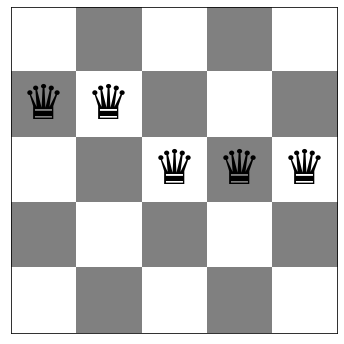

Conflicts Before: 5
Conflicts Now: 4
Board with 4 conflicts.


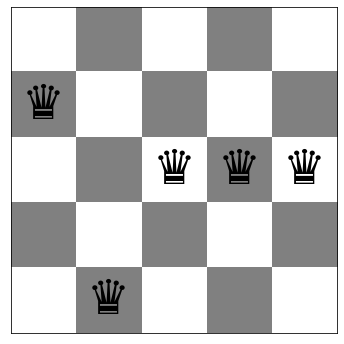

Conflicts Before: 4
Conflicts Now: 3
Board with 3 conflicts.


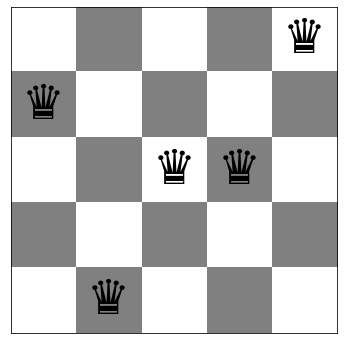

Conflicts Before: 3
Conflicts Now: 2
Board with 2 conflicts.


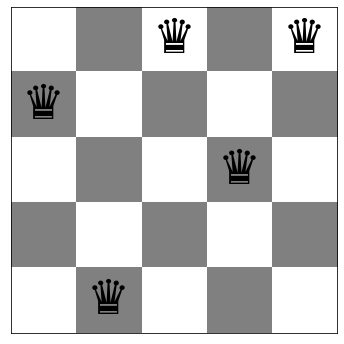

Conflicts Before: 2
Conflicts Now: 1
Board with 1 conflicts.


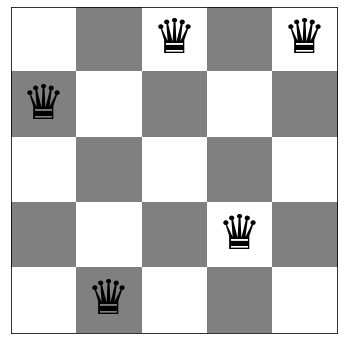

Conflicts Before: 1
Conflicts Now: 1
Board with 1 conflicts.


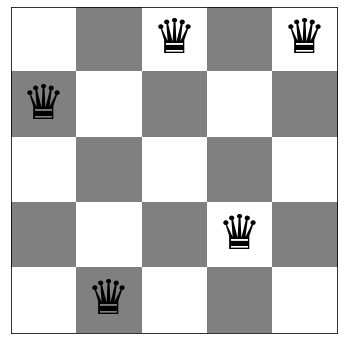

Conflicts Before: 1
Conflicts Now: 1
Board with 1 conflicts.


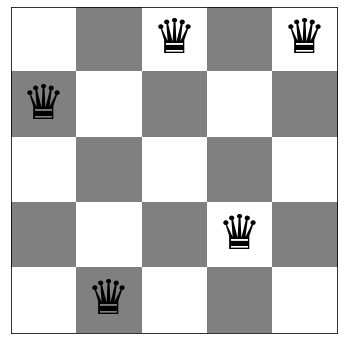

Steps: 353


In [178]:
board = random_board(5)
b = Simulated_Annealing(board, verbose = True)

In [179]:
n = 20
total = 0
boards = [4,5,6,7,8,9,10,11,12,13,14]
avgObj = []
avgTimes = []

for b in boards:
    obj = []
    times = []
    for j in range(n):
        randomB = random_board(b)
        start = time.time()
        solve = First_Choice_Climb(randomB)
        stop = time.time()
        obj.append(conflicts(solve))
        times.append((stop-start)*1e3)
   
    avgObj.append(np.average(obj))
    avgTimes.append(np.average(times)) 
    

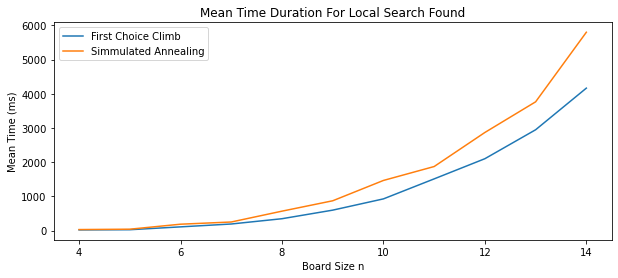

In [196]:
plt.plot(allTimes["Board Size"], allTimes["First Choice Climb"], label = "First Choice Climb")
plt.plot(boards, avgTimes, label= "Simmulated Annealing")
plt.rcParams["figure.figsize"] = (10,6)
plt.title("Mean Time Duration For Local Search Found")
plt.xlabel("Board Size n")
plt.ylabel("Mean Time (ms)")
plt.legend(loc=2)
plt.show()


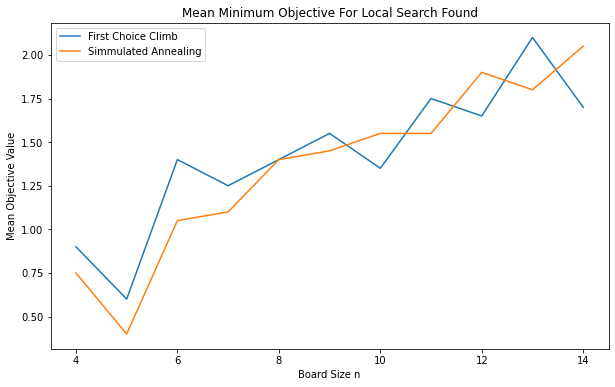

In [197]:
plt.plot(allObjs["Board Size"], allObjs["First Choice Climb"], label = "First Choice Climb")
plt.plot(boards, avgObj, label="Simmulated Annealing")
plt.rcParams["figure.figsize"] = (10,6)
plt.title("Mean Minimum Objective For Local Search Found")
plt.xlabel("Board Size n")
plt.ylabel("Mean Objective Value")
plt.legend(loc=2)
plt.show()

### Graduate Response

The performance of the simmulated annealing algorithm matches that of the First choice Climb algorithm, but is more likely to find a smaller objective value than its predecessor for boards smaller than 9x9. In addition, the rate at which the duration of the solve takes is smaller than that of the First Choice algorithm which means that the use of this method is more practical for larger boards than that of the former. While it is dissapointing to not see an decrease in the objective function compared to the others it illustrates that this method can slightly improve the results. Furthermore the addition of a less strict schedule or adding random restarts could significantly improve the objective function minimization, but at a large cost to time.

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [10]:
# Code and description go here